In [ ]:
import os
from os.path import join
from datetime import datetime
import time
import torch

import sys
sys.path.append('../')
from syncdiffusion.syncdiffusion_model import SyncDiffusion
from syncdiffusion.utils import seed_everything

device = "cuda" if torch.cuda.is_available() else "cpu"  

### Load SyncDiffusion

In [ ]:
syncdiffusion = SyncDiffusion(device, sd_version="2.0")

### Set prompt and SyncDiffusion parameters

In [4]:
# prompts
prompt = "a cinematic view of a castle in the sunset"
negative_prompt = ""

# resolution
height = 512
width = 2048    # 1024, 3072

# SyncDiffusion
num_steps = 50
guidance_scale = 7.5
stride = 16

# (1) gradient descent weight 'w' in the paper
sync_weight = 20.0

# (2) sync_thres=n: compute SyncDiffusion only for the first n steps
sync_thres = 10

# (3) sync_freq=n: perform gradient descent every n steps
sync_freq = 1

# (4) decay rate for sync_weight, set as 0.95 in the paper
sync_decay_rate = 0.95

### Generate a panorama with SyncDiffusion

In [ ]:
# set seed
seed = 100
seed_everything(seed)

# sample
start_time = time.time()

img = syncdiffusion.sample_syncdiffusion(
    prompts = prompt,
    negative_prompts = negative_prompt,
    height = height,
    width = width,
    num_inference_steps = num_steps,
    guidance_scale = 7.5,
    sync_weight = sync_weight,
    sync_decay_rate = sync_decay_rate,
    sync_freq = sync_freq,
    sync_thres = sync_thres,
    stride = stride
)

sampling_time = time.time() - start_time
print(f"Sampling time: {sampling_time:.2f}s")

Prompt: a cinematic view of a castle in the sunset


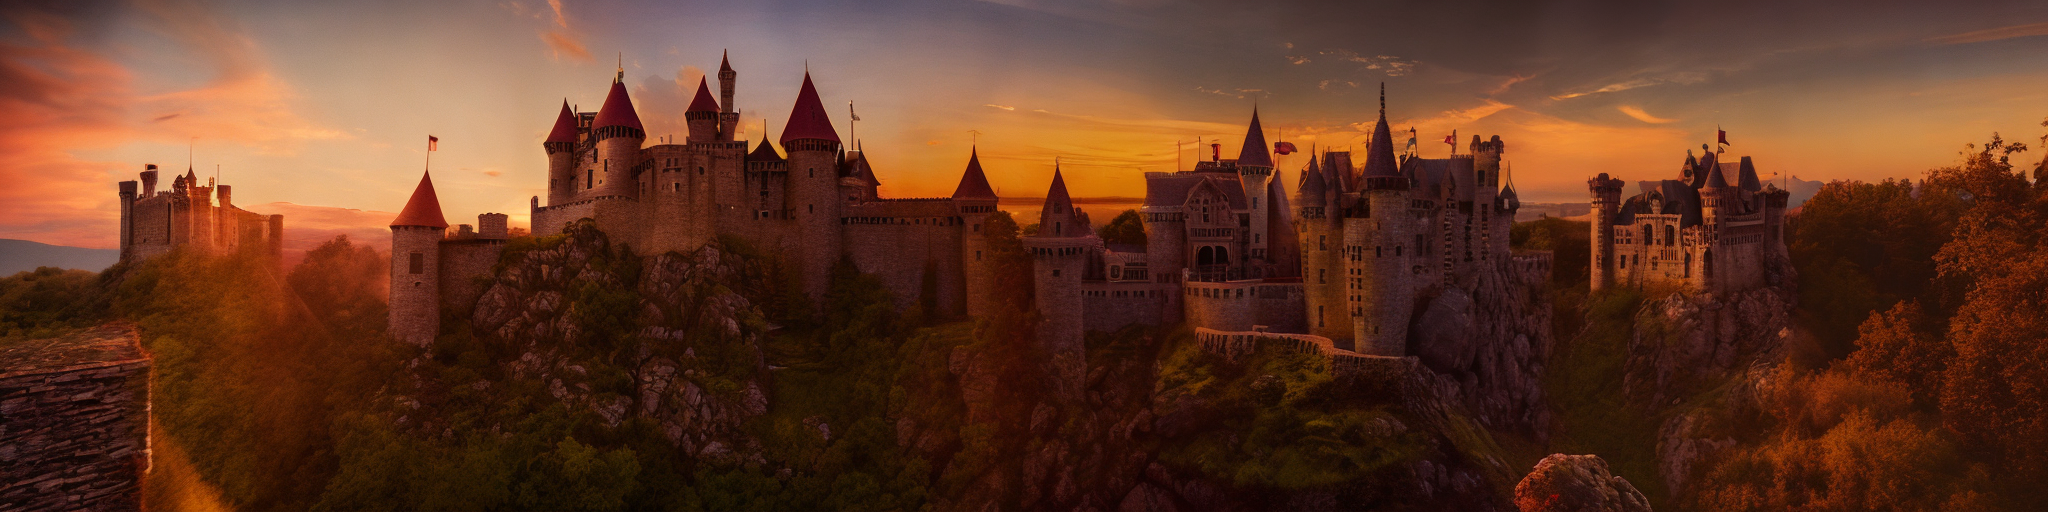

In [6]:
print(f"Prompt: {prompt}")

# visualize
img